In [103]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
#Loading Dataset

data=pd.read_csv('house_prices.csv')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [105]:
list(data.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [107]:
#Preprocessing data

data.shape

(21613, 21)

In [108]:
data.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
919,1431700370,20140519T000000,290000.0,5,1.50,2120,7700,1.5,N,0,...,7,2120,0,1962,0,98058,47.4599,-122.172,1730,7700
19289,3416600490,20140731T000000,675000.0,3,2.25,1780,4252,2.0,N,0,...,8,1540,240,1989,0,98144,47.6004,-122.292,2220,4000
9987,4040400200,20141007T000000,527500.0,5,2.25,2530,8250,2.0,N,0,...,7,2530,0,1961,0,98007,47.6117,-122.134,2020,8250


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [110]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [111]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [113]:
#Select feature and labels
X=data[['sqft_living']]
y=data['price']

In [114]:
#Split data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [116]:
#train

model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
#Predict Values
y_pred= model.predict(X_test)

In [120]:
#Evaluate
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Sqared score:{mse:.2f}')
r2=r2_score(y_test,y_pred)
print(f'R2 score:{r2:.2f}')

Mean Sqared score:76484977061.78
R2 score:0.49


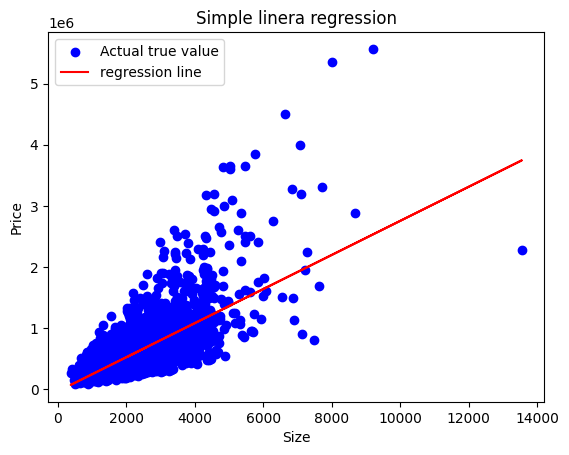

In [121]:
#Visulize the results

plt.scatter(X_test,y_test, color='blue',label='Actual true value')
plt.plot(X_test,y_pred,color="red", label="regression line")
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Simple linera regression')
plt.legend()
plt.show()

In [122]:
#Predict house price with 1800sf

example=pd.DataFrame({'sqft_living':[1800]})
predicted_price=model.predict(example)
print(f"Predicted price of house with 1800sqft: ${predicted_price[0]:,.2f}")

Predicted price of house with 1800sqft: $461,199.42


In [123]:
#Multi linear

data=pd.read_csv('house_prices.csv')

In [125]:
#Select multiple features
X=data[["sqft_living",'bedrooms']]
y=data['price']

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
#train

model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
y_pred=model.predict(X_test)

In [129]:
#Evaluate

mse=mean_squared_error(y_test,y_pred)
print(f'Mean Sqared score:{mse:.2f}')

r2=r2_score(y_test,y_pred)
print(f'R2 score:{r2:.2f}')

Mean Sqared score:74174783292.51
R2 score:0.51


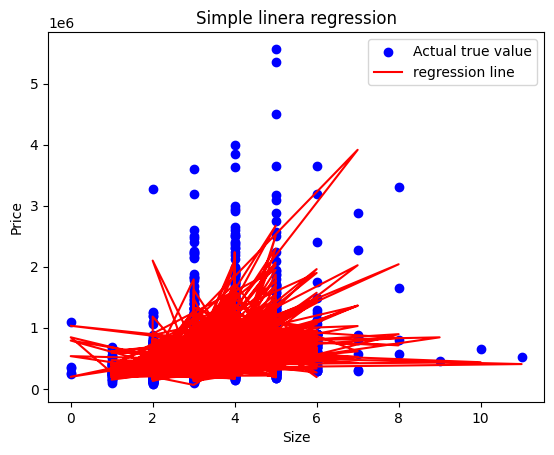

In [137]:
#Visulize the results

plt.scatter(X_test.bedrooms,y_test, color='blue',label='Actual true value')
plt.plot(X_test.bedrooms,y_pred,color="red", label="regression line")
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Simple linera regression')
plt.legend()
plt.show()

In [133]:
example=pd.DataFrame({'sqft_living':[1800], "bedrooms":[3]})
predicted_price=model.predict(example)
print(f"Predicted price of house with 1800sqft: ${predicted_price[0]:,.2f}")

Predicted price of house with 1800sqft: $472,601.22
